# deepNeuroSeg quickstart

First, import the deepNeuroSeg itself:

In [1]:
from deepNeuroSeg import SegmentationFactory, SegmentationType

... and other reqired packages.

In [2]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# WMH Segmentation
First we will look at the WMH Segmentation use-case with both FLAIR and T1 scans:

In [3]:
wmh_test_flair = 'pmsd/test_your_data_WMH/data_example/4/FLAIR.nii.gz'
wmh_test_t1 = 'pmsd/test_your_data_WMH/data_example/4/T1.nii.gz'

WMH Segmentation can be performed with either both FLAIR and T1 scans or only FLAIR. The default is using both of them.

In [4]:
wmh_test = SegmentationFactory.create_segmenter(SegmentationType.WMH,
                                                FLAIR_path=wmh_test_flair,
                                                T1_path=wmh_test_t1)

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_FLAIR_T1/0.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21113&authkey=ALAHNnoGtEi7tl4"

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_FLAIR_T1/1.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21114&authkey=AAl5nwEj0AgyAcQ"

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_FLAIR_T1/2.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21112&authkey=ALZ8G_0zUgLo-ro"



The model for FLAIR+T1 WMH Segmentation is now downloaded to your computer:

In [5]:
!ls ~/.deepNeuroSeg

pretrained_FLAIR_T1


In [6]:
wmh_mask = wmh_test.perform_segmentation()

INFO:root:/Users/rita/.deepNeuroSeg/pretrained_FLAIR_T1
INFO:root:------------------------------
INFO:root:Predicting masks on test data...


/Users/rita/.deepNeuroSeg/pretrained_FLAIR_T1/0.h5
48/48 [==============================] - 15s 303ms/step


In [7]:
FLAIR_image = sitk.ReadImage(wmh_test_flair)
FLAIR_array = sitk.GetArrayFromImage(FLAIR_image)
FLAIR_array.shape

(48, 240, 240)

In [8]:
wmh_mask.shape

(48, 240, 240)

Let's visualize the resulting mask (numpy.array):

Text(0.5, 1.0, 'WMH mask regions highlighted')

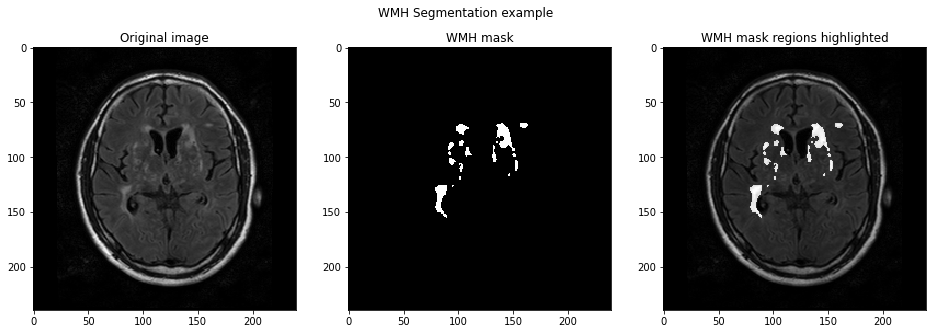

In [9]:
slice_ = 21
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle('WMH Segmentation example')
ax1.imshow(FLAIR_array[slice_,:,:], interpolation='none', cmap='gray')
ax1.set_title("Original image")
ax2.imshow(wmh_mask[slice_,:,:], interpolation='none', cmap='gray')
ax2.set_title("WMH mask")
ax3.imshow(np.add(FLAIR_array[slice_,:,:],wmh_mask[slice_,:,:]*(np.max(FLAIR_array)/2)), interpolation='none', cmap='gray')
ax3.set_title("WMH mask regions highlighted")

The mask can be saved with a specific file input:

In [10]:
wmh_test.save_segmentation(mask=wmh_mask, outputPath='pmsd/test_your_data_WMH/data_example/4/deepNeuroSeg_res.nii.gz')

The other possibilty is to run WMH Segmentation only with FLAIR:

In [11]:
wmh_test2 = SegmentationFactory.create_segmenter(SegmentationType.WMH,
                                                FLAIR_path=wmh_test_flair)
wmh_mask2 = wmh_test2.perform_segmentation()

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_FLAIR_only/0.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21110&authkey=ANvFSyNpSSjh3NQ"

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_FLAIR_only/1.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21111&authkey=APGrgxpxl_4OBHE"

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_FLAIR_only/2.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21109&authkey=AONWUbE5llZpbS4"

INFO:root:/Users/rita/.deepNeuroSeg/pretrained_FLAIR_only
INFO:root:------------------------------
INFO:root:Predicting masks on test data...


/Users/rita/.deepNeuroSeg/pretrained_FLAIR_only/0.h5
48/48 [==============================] - 13s 263ms/step


The model for FLAIR WMH Segmentation is now downloaded to your computer:

In [12]:
!ls ~/.deepNeuroSeg

pretrained_FLAIR_T1   pretrained_FLAIR_only


Text(0.5, 1.0, 'WMH masks difference')

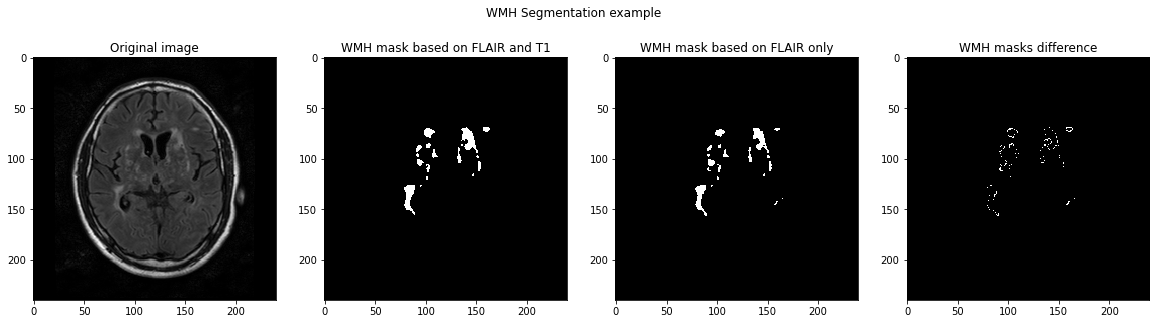

In [13]:
slice_ = 21
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('WMH Segmentation example')
ax1.imshow(FLAIR_array[slice_,:,:], interpolation='none', cmap='gray')
ax1.set_title("Original image")
ax2.imshow(wmh_mask[slice_,:,:], interpolation='none', cmap='gray')
ax2.set_title("WMH mask based on FLAIR and T1")
ax3.imshow(wmh_mask2[slice_,:,:], interpolation='none', cmap='gray')
ax3.set_title("WMH mask based on FLAIR only")
ax4.imshow(abs(wmh_mask[slice_,:,:]-wmh_mask2[slice_,:,:]), interpolation='none', cmap='gray')
ax4.set_title("WMH masks difference")

# Claustrum Segmentation
Claustrum Segmentation requires only the T1 scan:

In [14]:
c_test_t1 = 'pmsd/task_AB/task_B_claustrum/005/data/T1.nii.gz'

In [15]:
c_test = SegmentationFactory.create_segmenter(SegmentationType.Claustrum, T1_path=c_test_t1)

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_T1_claustrum/axial_0.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21120&authkey=AM4S6ZzpCEY4B0g"

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_T1_claustrum/axial_1.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21121&authkey=AEDWiapn9bksT94"

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_T1_claustrum/axial_2.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21122&authkey=ANEGp1S5oXy75-o"

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pretrained_T1_claustrum/coronal_0.h5 --no-check-certificate "https://onedrive.live.com/download?cid=57A6FFA5FD700FDB&resid=57A6FFA5FD700FDB%21123&authkey=AG-qBBe1ENeIov8"

INFO:deepNeuroSeg.run_utils:
wget -O /Users/rita/.deepNeuroSeg/pre

The model for Claustrum Segmentation is now downloaded to your computer:

In [16]:
!ls ~/.deepNeuroSeg

pretrained_FLAIR_T1     pretrained_FLAIR_only   pretrained_T1_claustrum


In [17]:
c_mask = c_test.perform_segmentation()

90/90 [==============================] - 9s 101ms/step


In [18]:
T1_image = sitk.ReadImage(c_test_t1)
T1_array = sitk.GetArrayFromImage(T1_image)
T1_array.shape

(150, 215, 163)

In [19]:
c_mask.shape

(150, 215, 163)

Text(0.5, 1.0, 'Claustrum mask regions highlighted')

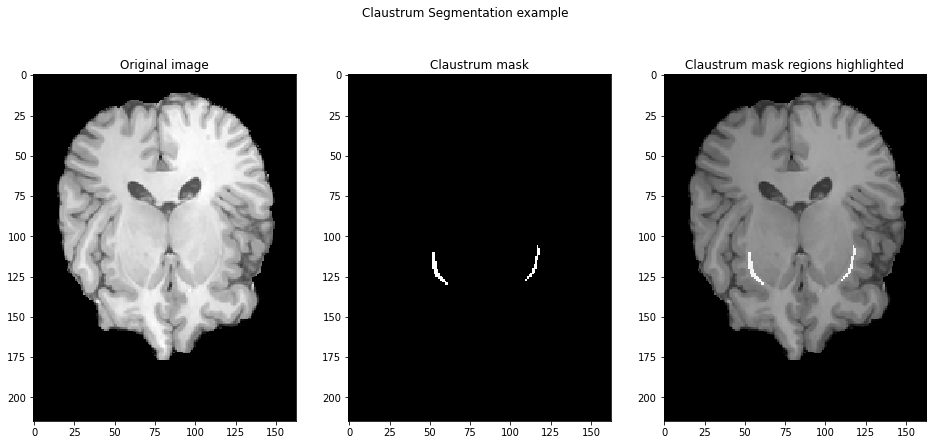

In [20]:
slice_ = 72
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,7))
fig.suptitle('Claustrum Segmentation example')
ax1.imshow(T1_array[slice_,:,:], interpolation='none', cmap='gray')
ax1.set_title("Original image")
ax2.imshow(c_mask[slice_,:,:], interpolation='none', cmap='gray')
ax2.set_title("Claustrum mask")
ax3.imshow(np.add(T1_array[slice_,:,:],c_mask[slice_,:,:]*(np.max(T1_array)/2)), interpolation='none', cmap='gray')
ax3.set_title("Claustrum mask regions highlighted")

The mask can be saved to the specified directory:

In [21]:
c_test.save_segmentation(mask=wmh_mask, outputPath='pmsd/task_AB/task_B_claustrum/005/data/')

... and can be then found under the name out_mask.nii.gz

In [22]:
! ls pmsd/task_AB/task_B_claustrum/005/data/

T1.nii.gz       out_mask.nii.gz


Special feature of Claustrum Segmentation: The user can check the orientation of the coronal and axial images by selecting the special feature in perform_segmentation method:

In [23]:
_ = c_test.perform_segmentation(check_orientation=True)

90/90 [==============================] - 8s 84ms/step


The resulting slice images are saved into two folders:

In [24]:
! ls ~/.deepNeuroSeg/images

axial   coronal


Text(0.5, 1.0, 'Coronal image')

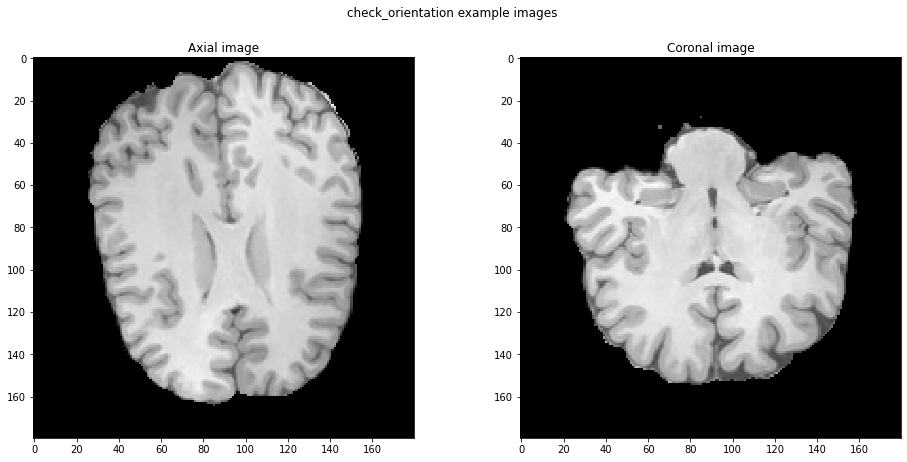

In [25]:
example_path1 = os.path.join( os.path.realpath(os.path.expanduser('~/.deepNeuroSeg')), 'images/axial/59.png')
example_image1 = plt.imread(example_path1)

example_path2 = os.path.join( os.path.realpath(os.path.expanduser('~/.deepNeuroSeg')), 'images/coronal/59.png')
example_image2 = plt.imread(example_path2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('check_orientation example images')
ax1.imshow(example_image1, interpolation='none', cmap='gray')
ax1.set_title("Axial image")
ax2.imshow(example_image2, interpolation='none', cmap='gray')
ax2.set_title("Coronal image")